In [1]:
import pandas as pd
from busca_periodo import parse_csv_results, busca_documentos
from datetime import date
import openpyxl
import matplotlib

C:\Users\daiana.sales\AppData\Local\Temp\ipykernel_18540\2462962269.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
inicio = date(2023, 1, 1)
fim = date(2023, 12, 31)

documentos = busca_documentos(
    doc_type = 'REMA - Empréstimo de Materiais ou Ex. Geológicos',
    period=(inicio, fim)
)

documentos

In [ ]:
df = parse_csv_results(documentos)
df.info()

In [ ]:
df.iloc[:,37] = df.iloc[:,37].astype('str').apply(lambda x: x.lower()) 

In [47]:
df.iloc[:,37] = (
    df.iloc[:,37] 
# .replace(['geremi', '/', '-', 'sureg','/dimini/derem', 'residência de '], '') 
    .replace(['lamin', 'sureg-sp', 'sp', 'sureg-sp/geremi'], 'sp') 
    .replace(['geremi-be', 'sureg-be', 'sureg be','sureg_be','superintendência regional de belém','be', 'anm (dnpm)'], 'pa') 
    .replace(['geremi-bh', 'sureg-bh','belo horizonte','sureg bh', 'bh', 'digeco', 'diemge', 'geremi sureg-be', 'litoteca regional de caeté'], 'mg') 
    .replace(['geremi-pa', 'sureg-pa','porto alegre', 
          'superintendência regional de Porto Alegre', 
          'universidade federal do rio grande do sul', 
          'unisinos','ufrgs', 'rs', 'mining venture'], 'rs') 
    .replace(['xxxxx','derem','nacional','0','divisão de geodinâmica - digeod'],'go') 
    .replace(['sureg-ma', 'geremi-ma', 'manaus'], 'ma') 
    .replace(['fortaleza','refo'], 'ce') 
    .replace(['sureg-go'],'go') 
    .replace(['residência de porto velho','porto velho', 'repo'], 'ro') 
    .replace(['sureg-re/dimini/derem','digeom'], 'rn') 
    .replace(['sureg-sa'], 'ba')
    )

In [ ]:
material = (pd.DataFrame(df.iloc[:,40:50]
                .drop("Testemunhos de Sondagem (em metros)", axis="columns")
                .replace(r'[\-\w]+',0,regex=True)
                .convert_dtypes()
                .sum(),
            columns=["qtde"])
            .assign(custo=lambda df: df.qtde * 99.63))
material



In [ ]:
testemunhos = ( 
    pd.DataFrame( 
        df.iloc[:,[43]].sum(), 
        columns=["qtde"] 
    ) 
    .assign(custo=lambda df: df.qtde * 132.84) 
) 
testemunhos

In [51]:
custos_materiais = pd.concat([material, testemunhos], keys = 'custo') 
custos_materiais.to_csv('custos.csv')
custos_materiais

C:\Users\daiana.sales\AppData\Local\Temp\ipykernel_27928\2898219651.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  custos_materiais = pd.concat([material, testemunhos], keys = 'custo')


qtde        custo
c Alíquotas Geoquímicas                  388.0     39366.48
  Material de Referência                   0.0          0.0
  Rochas                                 354.0     35916.84
  Solos                                    0.0          0.0
  Sedimentos de Corrente                   1.0       101.46
  Concentrados de Batéia                   0.0          0.0
  Lâminas Petrográficas                   86.0      8725.56
  Seções Polidas                           0.0          0.0
  Cadernetas de Campo                     44.0      4464.24
u Testemunhos de Sondagem (em metros)  2827.37  383928.5723

In [52]:
_custos = custos_materiais.style.format({"custo": 'R$ {:0.2f}'}) 
_custos.to_excel('rema.xlsx')



AttributeError: 'Styler' object has no attribute 'iloc'

In [ ]:
####################################################################### 
## Custos dos materiais  
####################################################################### 
 
material = ( 
    pd.DataFrame( 
        df.iloc[:,40:50] 
            .drop("Testemunhos de Sondagem (em metros)", axis="columns") 
            .replace(r'[\-\w]+',0,regex=True) 
            .convert_dtypes() 
            .sum(), 
        columns=["qtde"] 
    ) 
    .assign(custo=lambda df: df.qtde * 101.46) 
) 
 
testemunhos = ( 
    pd.DataFrame( 
        df.iloc[:,[43]].sum(), 
        columns=["qtde"] 
    ) 
    .assign(custo=lambda df: df.qtde * 135.79) 
) 
 
custos_materiais = pd.concat([material, testemunhos], keys = "custo") 
 
#_custos = custos_materiais.style.format({"qtde":'{:0.2f}'})
_custos = custos_materiais.style.format({"custo R$": 'R$ {:0.2f}'}) 

_custos

In [48]:
print (df['Tipo de Solicitante'].value_counts())
print (df['Unidade Executora'].value_counts())

Tipo de Solicitante
Interno    29
Externo     4
Name: count, dtype: int64
Unidade Executora
pa    18
mg     6
ce     2
df     2
ro     2
rs     1
go     1
ba     1
Name: count, dtype: int64


In [25]:
df.to_csv('rema.csv');

<Axes: ylabel='Métodos Analíticos'>

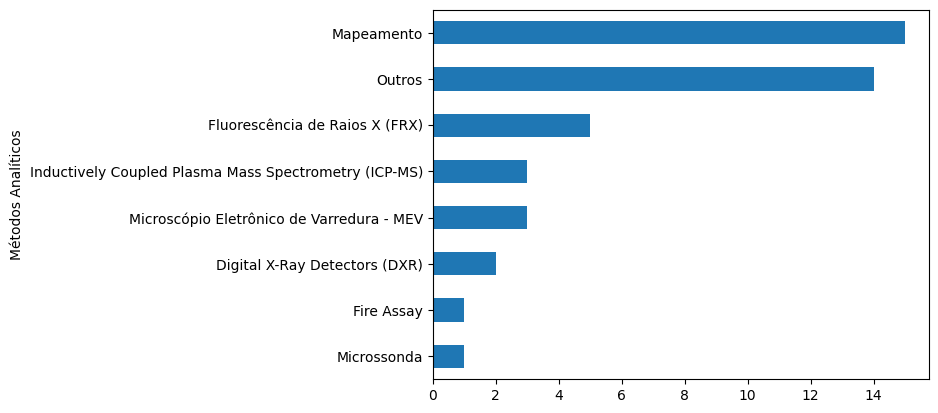

In [45]:
ylabel= 'Métodos Analíticos' 
( 
    df.reset_index() 
    .melt(id_vars=["index"], value_vars=df.columns[6:22],var_name = ylabel) 
    .query('value == True') 
    .loc[:, ylabel] 
#    .squeeze() 
    .value_counts(ascending=True) 
    .plot(kind='barh') 
)

# ylabel= 'Finalidade' 
# ( 
#     df.reset_index() 
#     .melt(id_vars=["index"], value_vars=df.columns[22:32],var_name = ylabel) 
#     .query('value == True') 
#     .loc[:, ylabel] 
# #    .squeeze() 
#     .value_counts(ascending=True) 
#     .plot(kind='barh') 
# )

#df.iloc[:, 0].value_counts().plot.pie()

Fazendo o para a REVI

In [ ]:
inicio = date(2023, 1, 1)
fim = date(2023, 12, 31)

documentos_revi = busca_documentos(
    doc_type = 'REVI - Visitação à Rede de Litotecas',
    period=(inicio, fim)
)

documentos_revi

In [ ]:
revi = parse_csv_results(documentos_revi)
revi.info()

In [ ]:
from datetime import datetime, timedelta

In [ ]:
revi['Data Inicial'] = pd.to_datetime(revi['Data Inicial'].astype(str), format='%d/%m/%Y')


In [ ]:
revi['Data Final'] = pd.to_datetime(revi['Data Final'].astype(str), format='%d/%m/%Y')

In [ ]:
revi['duracao'] = ((revi.iloc[:,6]) - (revi.iloc[:,5])).dt.days

In [ ]:
revi['custo'] = revi['duracao']*797.04*2


In [ ]:
revi['custo'].sum()

In [ ]:
revi['Número de Participantes'].sum()

In [ ]:
revi['Tipo de Visitação'].value_counts()

In [ ]:
revi['Litoteca de Interesse'].value_counts()

In [ ]:
revi.info()

In [2]:
inicio = date(2023, 1, 1)
fim = date(2023, 12, 31)

documentos_ruse = busca_documentos(
    doc_type = 'RUSE - Utilização das Salas/Setores das Litotecas',
    period=(inicio, fim)
)

documentos_ruse

INFO:root:Autenticando como daiana.sales
INFO:root:Preenchendo o formulário de pesquisa
INFO:root:Evento de click disparado: javascript:navegar('10')
INFO:root:Paginação concluída.


'd:\\Daiana Sales\\auto-sei-edu\\extraidos\\processos.csv'

In [3]:
ruse = parse_csv_results(documentos_ruse)
ruse.info()

d:\Daiana Sales\auto-sei-edu\busca_periodo.py:227: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  .apply(lambda x: pd.to_numeric(x.str.replace(",", "."), errors="ignore"))
d:\Daiana Sales\auto-sei-edu\busca_periodo.py:228: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .apply(lambda x: x.replace("Sim", True).replace("Não", False))


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 0
Data columns (total 34 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Tipo de Solicitante                                               10 non-null     object 
 1   Nome do Solicitante                                               10 non-null     object 
 2   Organização/Unidade                                               10 non-null     object 
 3   E-mail                                                            10 non-null     object 
 4   Telefone (com DDD)                                                10 non-null     object 
 5   Litoteca de Interesse                                             10 non-null     object 
 6   Cursos                                                            10 non-null     bool   
 7   Workshop                                   

In [4]:
ruse['Data Inicial'] = pd.to_datetime(ruse['Data Inicial'].astype(str), format='%d/%m/%Y')
ruse['Data Final'] = pd.to_datetime(ruse['Data Final'].astype(str), format='%d/%m/%Y')
ruse['duracao'] = (pd.to_datetime(ruse['Data Final']) - pd.to_datetime(ruse['Data Inicial'])).dt.days


In [ ]:
ruse['custo'] = ruse['duracao']*797.04*2

In [5]:
ruse['duracao']

0       12
0        0
0     2546
0    27749
0       12
0       13
0       19
0        0
0        5
0        0
Name: duracao, dtype: int64

In [ ]:
ruse['custo'].sum()

In [ ]:
print (revi['duracao'].sum())
print (ruse['duracao'].sum())
print (ruse['Litoteca de Interesse'].value_counts())
print (ruse['Tipo de Solicitante'].value_counts())
print (ruse['Número de Participantes'].sum())


In [3]:
inicio = date(2023, 1, 1)
fim = date(2023, 12, 31)

documentos_rime = busca_documentos(
    doc_type = 'RIME - Incorporação de Materiais ou Ex. Geológicos',
    period=(inicio, fim)
)

INFO:root:Autenticando como daiana.sales
INFO:root:Preenchendo o formulário de pesquisa


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="txtDataInicio"]"}
  (Session info: chrome=122.0.6261.96); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6470DAD32+56930]
	(No symbol) [0x00007FF64704F632]
	(No symbol) [0x00007FF646F042E5]
	(No symbol) [0x00007FF646F498ED]
	(No symbol) [0x00007FF646F49A2C]
	(No symbol) [0x00007FF646F8A967]
	(No symbol) [0x00007FF646F6BCDF]
	(No symbol) [0x00007FF646F881E2]
	(No symbol) [0x00007FF646F6BA43]
	(No symbol) [0x00007FF646F3D438]
	(No symbol) [0x00007FF646F3E4D1]
	GetHandleVerifier [0x00007FF647456ABD+3709933]
	GetHandleVerifier [0x00007FF6474AFFFD+4075821]
	GetHandleVerifier [0x00007FF6474A818F+4043455]
	GetHandleVerifier [0x00007FF647179766+706710]
	(No symbol) [0x00007FF64705B90F]
	(No symbol) [0x00007FF647056AF4]
	(No symbol) [0x00007FF647056C4C]
	(No symbol) [0x00007FF647046904]
	BaseThreadInitThunk [0x00007FFEA8D07344+20]
	RtlUserThreadStart [0x00007FFEA8FE26B1+33]


In [ ]:
ruse = parse_csv_results(documentos_ruse)
ruse.info()

In [4]:
inicio = date(2024, 1, 1)
fim = date(2024, 3, 31)

documentos_rame = busca_documentos(
    doc_type = 'RAME - Armazenamento na Rede de Litotecas',
    period=(inicio, fim)
)

documentos_rame

INFO:root:Autenticando como daiana.sales
INFO:root:Preenchendo o formulário de pesquisa
INFO:root:Evento de click disparado: javascript:navegar('10')
INFO:root:Paginação concluída.


'd:\\Daiana Sales\\auto-sei-edu\\extraidos\\processos.csv'

In [5]:
rame = parse_csv_results(documentos_rame)
rame.info()

d:\Daiana Sales\auto-sei-edu\busca_periodo.py:227: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  .apply(lambda x: pd.to_numeric(x.str.replace(",", "."), errors="ignore"))
d:\Daiana Sales\auto-sei-edu\busca_periodo.py:228: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .apply(lambda x: x.replace("Sim", True).replace("Não", False))


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 0
Data columns (total 22 columns):
 #   Column                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                           --------------  -----  
 0   Nome do(a) Solicitante                                                                                           10 non-null     object 
 1   Unidade                                                                                                          10 non-null     object 
 2   E-mail                                                                                                           10 non-null     object 
 3   Telefone (com DDD)                                                                                               10 non-null     object 
 4   Ano do Projeto                                

In [6]:
rame.to_csv('rame.csv')
rame

,Nome do(a) Solicitante,Unidade,E-mail,Telefone (com DDD),Ano do Projeto,Nome do Projeto,Unidade Executora,Centro de Custo do Projeto,Número do SGP,Requisição de Análise (RA),...,Alíquotas Geoquímicas,Rochas,Testemunhos de Sondagem (quantidade total dos intervalos em metros),Solos,Sedimentos de Corrente,Concentrados de Batéia,Lâminas Petrográficas,Seções Polidas,Cadernetas de Campo,Foi inserido documento Externo do tipo Anexo no processo com a relação de materiais e/ou exemplares geológicos.
0,Isabel Matos,Superintendência Regional de Salvador (SUREG-SA),isabel.matos@sgb.gov.br,(71)02101-7309,2015,2 cadernetas: Projeto CHOMA (Chorrochó-Macurur...,GEREMI,4316400,-,-,...,0,0,0.0,0,0,0,0,0,2,False
0,Isabel Matos,Superintendência Regional de Salvador (SUREG-SA),isabel.matos@sgb.gov.br,(71)02101-7309,2009,1 caderneta de Geoquímica: Projeto Fosfato Bra...,GEREMI,4068,-,-,...,0,0,0.0,0,0,0,0,0,1,False
0,Isabel Matos,Superintendência Regional de Salvador (SUREG-SA),isabel.matos@sgb.gov.br,(71)02101-7309,2010,Projeto Fosfato Brasil - I (vermiculita) e II ...,GEREMI,4102,-,-,...,0,0,0.0,0,0,0,0,0,3,False
0,Isabel Matos,Superintendência Regional de Salvador (SUREG-SA),isabel.matos@sgb.gov.br,(71)02101-7309,2009,Projeto PUMA (Uauá-Monte Santo) - Puma I. II. ...,GEREMI,4068,-,-,...,0,0,0.0,0,0,0,0,0,5,False
0,Djalma Hartery,Superintendência Regional de Belém (SUREG-BE),djalma.hartery@sgb.gov.br,(91)98184-9100,2001,Projeto RENCA,SUREG BE,2001300,-,-,...,0,0,0.0,0,0,0,402,0,0,True
0,ANDRE LUIS INVERNIZZI,Escritório do Rio de Janeiro (ERJ),andreinvernizzi@gmail.com,(00)00000-0000,2020,Baixio,Digate,4452,-,-,...,0,0,0.0,159,0,0,0,0,0,True
0,ANDRE LUIS INVERNIZZI,Escritório do Rio de Janeiro (ERJ),andreinvernizzi@gmail.com,(21)99973-7097,2020,Munin,Digate,4452,-,-,...,0,0,0.0,92,24,0,0,0,0,True
0,ANTONIA RAILINE DA COSTA SILVA,Superintendência Regional de Belém (SUREG-BE),antonia.costa@sgb.gov.br,(91)98824-6065,2021,GEOLOGIA. RECURSOS MINERAIS E ARQUITETURA CRUS...,GEREMI-BE,4447087,-,-,...,0,82,41.0,0,0,0,0,0,0,False
0,CESAR LISBOA CHAVES,Superintendência Regional de Belém (SUREG-BE),cesar.chaves@sgb.gov.br,(91)98157-5522,2004,GEOLOGIA E RECURSOS MINERAIS DA FOLHA CANDIDO ...,SUREG-BE,4140,-,-,...,0,0,0.0,0,0,0,47,0,0,True
0,CESAR LISBOA CHAVES,Superintendência Regional de Belém (SUREG-BE),cesar.chaves@sgb.gov.br,(91)98157-5522,2013,FOSFATO BRASIL,SUREG-BE,4068,-,-,...,0,0,0.0,0,0,0,49,0,0,True
